<a href="https://colab.research.google.com/github/LucasMirandaVS/estudos_python/blob/main/NLP_Buscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pacotes



In [ ]:
pip install wordcloud -q

In [ ]:
pip install nltk -q

In [ ]:
pip install unidecode -q

     |████████████████████████████████| 235 kB 2.1 MB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

# Tokenização
import nltk 
from nltk import tokenize

# Dados

In [ ]:
dados = pd.read_csv('buscape.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
dados.head()

,original_index,review_text,polarity,rating,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,4_55516,"Estou muito satisfeito, o visor é melhor do qu...",1.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,minus_1_105339,"""muito boa\n\nO que gostei: preco\n\nO que não...",1.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23_382139,"Rápida, ótima qualidade de impressão e fácil d...",1.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2_446456,Produto de ótima qualidade em todos os quesito!,1.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0_11324,Precisava comprar uma tv compatível com meu dv...,1.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Preciso dar uma normalizada nesses dados

In [ ]:
# Slicing do df
dados = dados.iloc[: , 0:3]

In [ ]:
dados.head()

,original_index,review_text,polarity
0,4_55516,"Estou muito satisfeito, o visor é melhor do qu...",1.0
1,minus_1_105339,"""muito boa\n\nO que gostei: preco\n\nO que não...",1.0
2,23_382139,"Rápida, ótima qualidade de impressão e fácil d...",1.0
3,2_446456,Produto de ótima qualidade em todos os quesito!,1.0
4,0_11324,Precisava comprar uma tv compatível com meu dv...,1.0


In [ ]:
dados.tail()

,original_index,review_text,polarity
84986,1_422965,"Produto muito bom, simples e barato",1.0
84987,minus_1_150466,O esquema antigo de desmontagem e limpeza das ...,
84988,0_414799,Esse jogo é muito maneiro é um jogo onde vc te...,1.0
84989,0_389898,Muito bom e intuitivo!\n\nO que gostei: Educa ...,
84990,0_476447,"Meu irmão possui um e acho excelente, estou ec...",1.0


Muito melhor.

# Bag of Words

In [ ]:
dados = dados.fillna('')

In [ ]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(dados.review_text)
print(bag_of_words.shape)

(84991, 50)


In [ ]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)
    regressao_logistica = LogisticRegression(solver = "lbfgs", max_iter=1000)
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)
print(classificar_texto(dados, "review_text", "polarity"))

0.7950865963855421


79% de acurácia! vamos tentar melhorar isso.

# Wordcloud

In [ ]:
%matplotlib inline

todas_palavras = ' '.join([texto for texto in dados.review_text])

nuvem_palvras = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(todas_palavras)

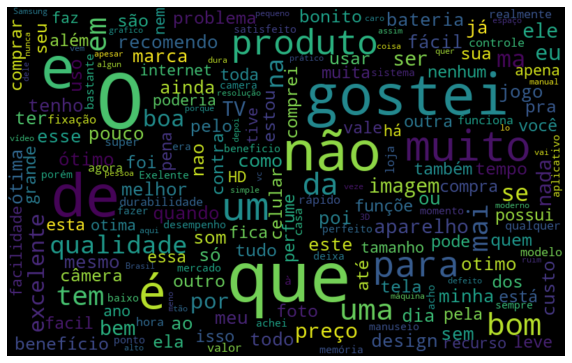

In [ ]:
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palvras, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Função que encontra as palavras negativas
def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query("polarity == '' ")
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])

    nuvem_palvras = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palvras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Função que encontra as palavras positivas
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query("polarity ==  '1.0' ")
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])

    nuvem_palvras = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palvras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

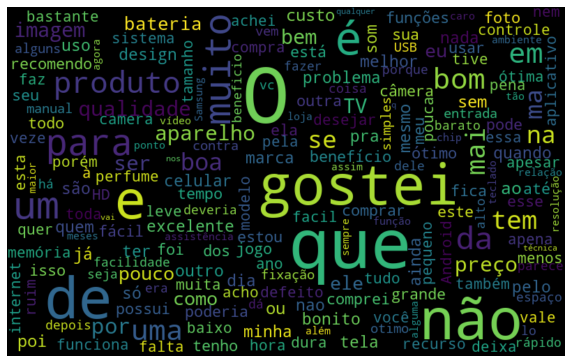

In [ ]:
# Negativas
nuvem_palavras_neg(dados, "review_text")

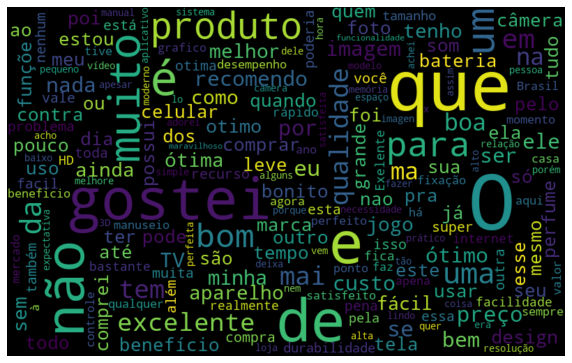

In [ ]:
# positivas
nuvem_palavras_pos(dados, "review_text")

# Tokenização

In [ ]:
# aplicando a okenização por espaço em branco
frase = "Bem vindo ao mundo do PLN!"

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']


In [ ]:
# Aplicando a tokenização ao dataset
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})

In [ ]:
df_frequencia.nlargest(columns = "Frequência", n = 10)

,Palavra,Frequência
8,que,180319
21,O,130370
35,de,120161
50,e,112599
22,gostei:,110892
28,não,97005
3,o,80945
65,a,78722
5,é,66779
1,muito,47822


In [ ]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()



pareto(dados, "review_text", 10)